In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from decision_trees.config import data_path
from decision_trees.plotting_utils import *

sns.set_context("talk")

# settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load In Data

Load in data (cleaned if was necessary)

In [35]:
fpath = "processed/breast_cancer.csv"
df = pd.read_csv(data_path / fpath)
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## 2. Describe data

Things to consider:
* datatypes: cat, float, int, datetime
* distributions of numerical data ~ predictor
* multi-variate distributions 

https://ieee-dataport.org/open-access/seer-breast-cancer-data

more info on 6th edition stages: https://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th/

Columns:
'Age': age of px at dx,
'Race': White, Black, Other, Other-Unspecified, Unknown (Other=Asian, Pacific Islander, American Indian)
'Marital Status': Single, Married, Separated, Divorced, Widowed. at time of dx,
'T Stage': size and extent of the main tumor (bigger is worse). T1-T4,
'N Stage': number of nearby affected lymph nodes. N1-N3,
'6th Stage': what stage of cancer - 6th edition stage of cancer, increases from IIA->IIB->IIIA->IIIB->IIIC,
'differentiate': range from Well->Moderate->Poorly->Undifferentiated, where undifferentiated is the worst,
'Grade': range from 1-4 (numerical encoding of "differentiate" column),
'A Stage': Regional or Distant. Distant means more metastasized (worse),
'Tumor Size': exact size in mm,
'Estrogen Status': if the tumor is Positive or Negative for estrogen receptors (if cancer cells are estrogen positive, it means it has receptors for estrogen, meaning estrogen levels affect the growth of the tumor. determining which receptor type you're positive for (estrogen and/or progesterone) determines what treatment options you have),
'Progesterone Status': Positive or Negative to progesterone receptors, same concept as estrogen,
'Regional Node Examined': total number of regional lymph nodes that were removed and examined by the pathologist,
'Regional Node Positive': total number of regional lymph nodes that were examined and found to be positive,
'Survival Months': amount of time px has survived since dx (if px is alive, this number is the min number of months they've survived, could be longer),
'Status': Alive or Dead

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Regional Node Positive  4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

## 3. Plot Data

List here variable of interest and relationships to plot

In [5]:
def example_plot_histogram(df, x_val, ax=None, title="", **kwargs):
    """
    Example function to plot a histogram using seaborn

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe containing the data to plot
    x_val : str
        Name of the column to plot
    ax : matplotlib.axes.Axes, optional
        Axes to plot on, by default None
    title : str, optional
        Title of the plot, by default ""
    **kwargs : dict
        Additional arguments to pass to seaborn.histplot,
        e.g. hue="var_name", ="stack"

    Returns
    -------
    matplotlib.axes.Axes
        Axes containing the plot
    """
    if ax is None:
        ax = mf()

    sns.histplot(data=df, x="x", ax=ax, **kwargs)

    ax.set_title(title)

    return ax

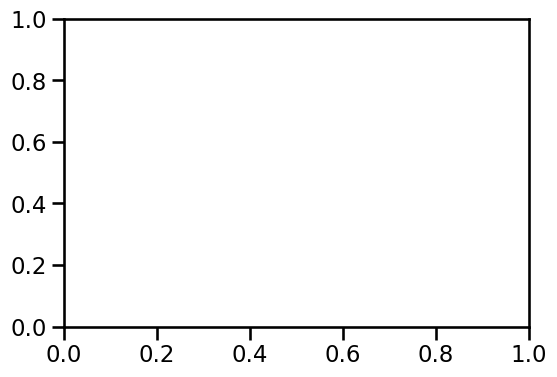

In [10]:
ax = mf((6, 4))  # mf = "make figure" from plot utils

